Yassine Ramy - 
Hoda Dades - 
Yasmine Ferdjani 

# Introduction

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.  
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file.   

Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:  

Age (numeric)  
Sex (text: male, female)  
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)  
Housing (text: own, rent, or free)  
Saving accounts (text - little, moderate, quite rich, rich)  
Checking account (numeric, in DM - Deutsch Mark)  
Credit amount (numeric, in DM)  
Duration (numeric, in month)  
Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others  
Risk (Value target - Good or Bad Risk)  

We want to study a regression in thi data, so first let's discover the file. 

# Set Up

In [1]:
pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.1.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.1.2-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp313-cp313-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp313-cp313-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp313-cp313-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp313-cp313-macosx_11_0_arm64.whl (63 kB)
Using cached pillow-11.0.0-cp313-cp313-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.

In [22]:
pip install scipy

  Using cached scipy-1.14.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp313-cp313-macosx_14_0_arm64.whl (23.1 MB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Discovery the dataset

In [56]:
import pandas as pd 

In [57]:
df = pd.read_csv('german_credit_data.csv', index_col = 0)

In [58]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [59]:
df_num = pd.DataFrame(df.select_dtypes(include= ['int64', 'float64']))
df_num

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


"Job" is qualitative so we remove her. And duration is in month so we rename her for mor precision. 

In [60]:
df_credit = df_num.drop(columns=['Job'])
df_credit = df_credit.rename(columns={'Duration': 'Duration in month'})
df_credit

,Age,Credit amount,Duration in month
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


So our dataset is ready to be analyse. So let's build a problematic. 

# How does the age and the repayment duration influence the amount of credit granted ?

# Visualization

To beginning we vizualise the data. 

In [61]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

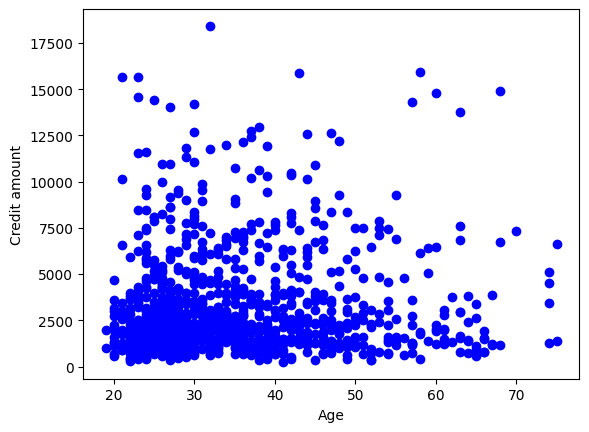

In [62]:
plt.scatter(df_credit["Age"], df_credit["Credit amount"], c = "blue" )
plt.xlabel("Age")
plt.ylabel("Credit amount")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

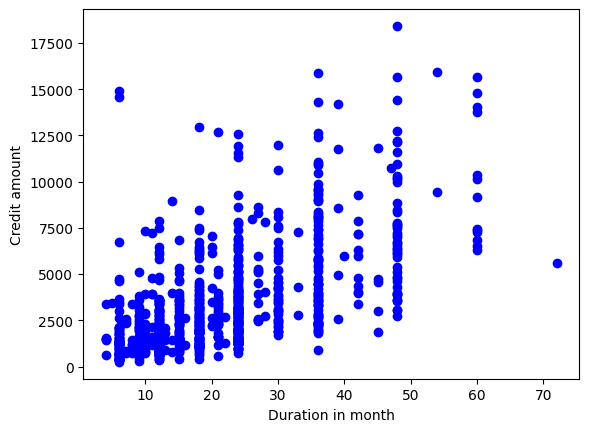

In [63]:
plt.scatter(df_credit["Duration in month"], df_credit["Credit amount"], c = "blue" )
plt.xlabel("Duration in month")
plt.ylabel("Credit amount")
plt.show

# Test of pearson

Supposons :  
H0 : les variables sont indépendantes  
H1 : les variables sont dépendantes  
Avec α = 0,01 soit 1% 

For the variable "Age"

In [ ]:
dependance_test = pd.DataFrame(pearsonr(df_credit["Age"], df_credit["Credit amount"]), index = ['pearsonr_coeff', 'p_value'], columns = ['results'])
dependance_test

: 

Le coefficient de Pearson est positif et supérieur à 0 mais cependant très faible.
De plus nous avons un coefficient "p" qui est supérieur à 1%, cela ne rentre pas dans notre cadre de précision on accepte alors l'hypothèse H0 et rejette l'hypothèse H1.  
Les variables sont indépendantes. 

In [68]:
dependance_test = pd.DataFrame(pearsonr(df_credit["Duration in month"], df_credit["Credit amount"]), index = ['pearsonr_coeff', 'p_value'], columns = ['results'])
dependance_test

,results
pearsonr_coeff,6.249842e-01
p_value,1.862851e-109


Le coefficient de Pearson est positif et supérieur à 0 mais est encore plus faible que le précédent. Le coefficient "p" est supérieur à 1%, cela rentre pas dans notre cadre de précision et on peut rejetter alors l'hypothèse H0 et accepter l'hypothèse H1.
Les variables sont dépendantes. Cependant le coefficient de Pearson est très faible peut-être des variables abérentes viennnet  
affaiblir ce coefficient.

# Remove the outlayers

In [96]:
from scipy import stats
from scipy.stats import pearsonr

In [97]:
Std_TD = df_credit["Credit amount"].std()
Moyen_TD = df_credit["Credit amount"].mean()
Interval = [Moyen_TD - Std_TD , Moyen_TD + Std_TD]
Interval

[np.float64(448.52112403955925), np.float64(6093.99487596044)]

In [74]:
df_credit["Credit amount_in"] = df_credit["Credit amount"].between(Interval[0], Interval[1]).astype(int)
df_credit

,Age,Credit amount,Duration in month,Credit amount prediction,Credit amount_in
0,67,1169,6,1090.996818,1
1,22,5951,48,7235.462338,1
2,49,2096,12,1968.777606,1
3,45,7882,42,6357.681550,0
4,53,4870,24,3724.339184,1
...,...,...,...,...,...
995,31,1736,12,1968.777606,1
996,40,3857,30,4602.119972,1
997,38,804,12,1968.777606,1
998,23,1845,45,6796.571944,1


In [79]:
df_credit_filtered = df_credit[df_credit["Credit amount_in"] == 1]

df_credit_filtered


,Age,Credit amount,Duration in month,Credit amount prediction,Credit amount_in
0,67,1169,6,1090.996818,1
1,22,5951,48,7235.462338,1
2,49,2096,12,1968.777606,1
4,53,4870,24,3724.339184,1
6,53,2835,24,3724.339184,1
...,...,...,...,...,...
995,31,1736,12,1968.777606,1
996,40,3857,30,4602.119972,1
997,38,804,12,1968.777606,1
998,23,1845,45,6796.571944,1


In [85]:
dependance_test_3= pd.DataFrame(pearsonr(df_credit_filtered["Duration in month"], df_credit_filtered["Credit amount"]), index = ['pearsonr_coeff', 'p_value'], columns = ['results'])
dependance_test_3

,results
pearsonr_coeff,5.277393e-01
p_value,2.867721e-61


# Remove the outlayers make the results worse, so finally we keep them

In [100]:
def prediction(X) : 
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_credit["Duration in month"], df_credit["Credit amount"])
    return slope * X + intercept
df_credit["Credit amount prediction"] = prediction(df_credit["Duration in month"])
df_credit

,Age,Credit amount,Duration in month,Credit amount prediction,Credit amount_in
0,67,1169,6,1090.996818,1
1,22,5951,48,7235.462338,1
2,49,2096,12,1968.777606,1
3,45,7882,42,6357.681550,0
4,53,4870,24,3724.339184,1
...,...,...,...,...,...
995,31,1736,12,1968.777606,1
996,40,3857,30,4602.119972,1
997,38,804,12,1968.777606,1
998,23,1845,45,6796.571944,1


<function matplotlib.pyplot.show(close=None, block=None)>

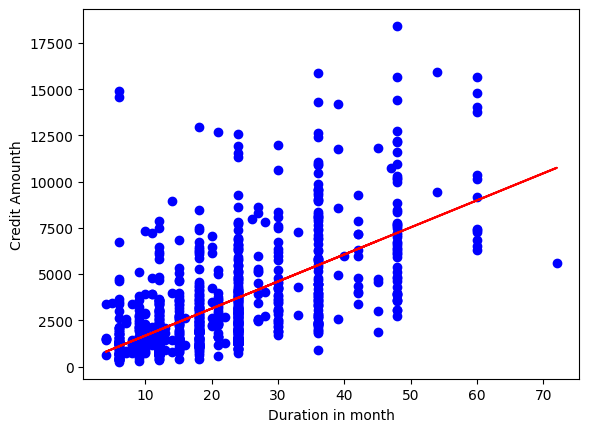

In [104]:
plt.scatter(df_credit["Duration in month"], df_credit["Credit amount"], c = "blue" )
plt.plot(df_credit["Duration in month"], df_credit["Credit amount prediction"], c = "red" )
plt.xlabel("Duration in month")
plt.ylabel("Credit Amounth")
plt.show

Ainsi nous concluons que plus la durée de remboursement augmente, plus le montant du crédit est élevé. 
Nous en tirons les hypothèses suivantes : 

- Pour des montants plus importants, les emprunteurs préfèrent (ou les prêteurs imposent) des durées plus longues afin de réduire les mensualités, facilitant ainsi la capacité de remboursement et réduisant le risque de défaut.
- Les institutions financières peuvent fixer des durées plus longues pour les crédits plus élevés, car cela étale le remboursement sur une période plus longue, réduisant ainsi la pression financière sur l'emprunteur.
- Les emprunteurs de gros montants peuvent être davantage motivés à choisir des durées longues pour maintenir leurs mensualités à un niveau abordable, malgré le coût total du crédit qui augmente avec la durée.
